In [11]:
import cv2
import datetime as dt
import glob
import itertools
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from keras import models, layers, optimizers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten, Reshape, Input, InputLayer
#from keras.layers.convolutional import MaxPooling2D
#from tensorflow.keras.layers import Dense,Dropout,Flatten, Reshape, Input, InputLayer
from keras.utils import to_categorical
from keras.regularizers import l2
#from keras.layers import Dense, Flatten, Reshape, Input, InputLayer


from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from sklearn.metrics import confusion_matrix
print ("TensorFlow version: " + tf.__version__)


ModuleNotFoundError: No module named 'cv2'

In [5]:
train_dir=r'F:\\GAIT RECOGNITION\\90degreegei\\train'
test_dir = r'F:\\GAIT RECOGNITION\\90degreegei\\test'

(240, 240, 3)


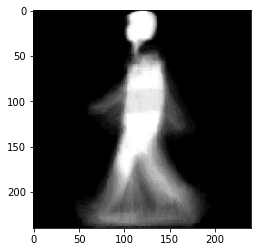

In [3]:
img = cv2.imread('F:\\GAIT RECOGNITION\\90degreegei\\train\\002\\002-nm-01-090.png')
print(img.shape)
plt.imshow(img);

In [4]:
height=240
width=240
batch_size=32

# Training generator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  color_mode='grayscale',
                                                  shuffle = False,
                                                  class_mode='categorical')

Found 496 images belonging to 124 classes.
Found 248 images belonging to 124 classes.


In [5]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005),activation='relu',input_shape=(240,240,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(128, (3, 3),kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(1024,kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005), activation='relu'))
model.add(Dense(124,kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005), activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [6]:
history = model.fit(train_generator,  
                    epochs=20
                    )

Train for 16 steps
Epoch 1/20
16/16 [==============================] - 15s 922ms/step - loss: 5.3829 - acc: 0.0081
Epoch 2/20
16/16 [==============================] - 1s 79ms/step - loss: 5.0539 - acc: 0.0464
Epoch 3/20
16/16 [==============================] - 1s 79ms/step - loss: 4.9190 - acc: 0.1028
Epoch 4/20
16/16 [==============================] - 1s 79ms/step - loss: 4.5259 - acc: 0.1169
Epoch 5/20
16/16 [==============================] - 1s 79ms/step - loss: 2.9446 - acc: 0.3851
Epoch 6/20
16/16 [==============================] - 1s 79ms/step - loss: 1.3378 - acc: 0.7520
Epoch 7/20
16/16 [==============================] - 1s 80ms/step - loss: 0.8278 - acc: 0.8750
Epoch 8/20
16/16 [==============================] - 1s 81ms/step - loss: 0.5181 - acc: 0.9597
Epoch 9/20
16/16 [==============================] - 1s 80ms/step - loss: 0.3939 - acc: 0.9738
Epoch 10/20
16/16 [==============================] - 1s 79ms/step - loss: 0.3390 - acc: 0.9859
Epoch 11/20
16/16 [===================

In [7]:
test_acc = model.evaluate(test_generator,verbose=1)                  
print(test_acc)

8/8 [==============================] - 2s 269ms/step - loss: 0.3859 - acc: 0.9637
[0.38593294098973274, 0.96370965]


In [8]:
model.save("model.h5")